# Importing Libraries

In [1]:
# Data manipulation and plotting modules
import numpy as np
import pandas as pd

# Data pre-processing
from sklearn.preprocessing import StandardScaler as ss

# Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling modules
from xgboost.sklearn import XGBClassifier

# Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# Plotting Modules
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# Permutation feature importance
from sklearn.inspection import permutation_importance

# Misc
import time
import os
import gc
import random

# Used in Randomized parameter search
from scipy.stats import uniform

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Set option to dislay many rows
pd.set_option('display.max_columns', 100)

# Mounting GDrive and loading the Dataset

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [4]:

path = '/gdrive/MyDrive/BDDA Project/BDDA/Rain in australia'
os.chdir(path)
os.listdir()

['weatherAUS.csv']

In [5]:
df = pd.read_csv("/gdrive/MyDrive/BDDA Project/BDDA/Rain in australia/weatherAUS.csv")

# Data Exploration

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.shape

(145460, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Data Cleaning

**Checking for null values**

In [9]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**Replacing numerical null values with mean**

In [10]:
mean = df.mean()
df.fillna(mean, inplace=True)

df.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

**Dropping Columns with null value**

In [11]:
df = df.dropna(how='any',axis=0)
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [12]:
df.drop('Date', axis=1, inplace=True)

**Defining categorical, numerical and target columns**

In [16]:
cat_columns = df.select_dtypes(include=['object']).columns
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
target_col = 'RainTomorrow'

In [17]:
df.RainToday.unique()

array(['No', 'Yes'], dtype=object)

In [18]:
cat_columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

# Data Visualization

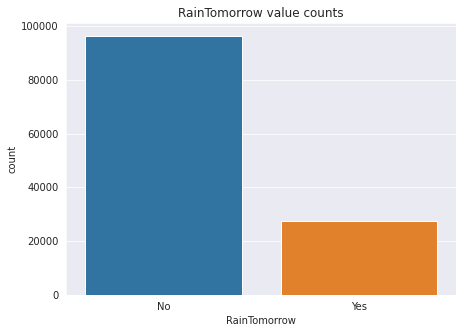

In [19]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
plt.title('RainTomorrow value counts')
sns.countplot(x=df["RainTomorrow"]);

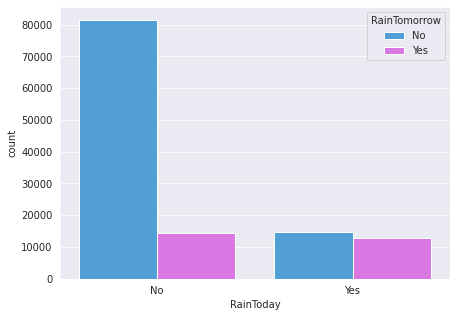

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(x=df["RainToday"], hue=df["RainTomorrow"], palette=sns.color_palette("husl")[4:]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


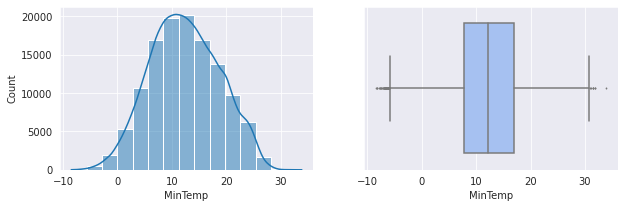

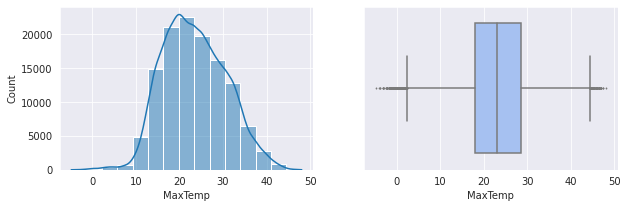

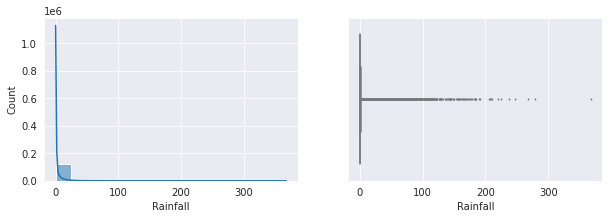

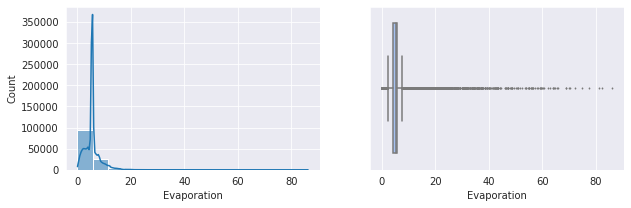

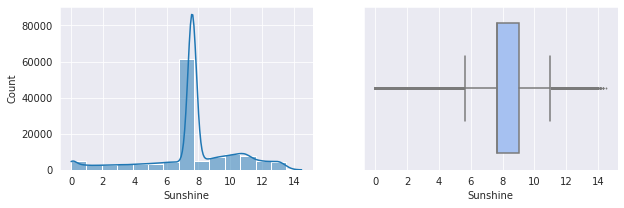

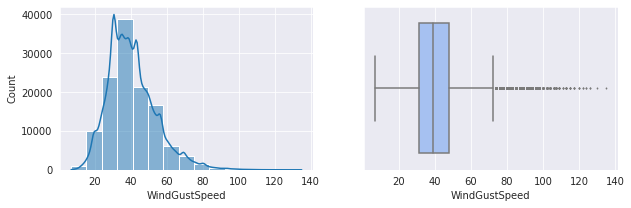

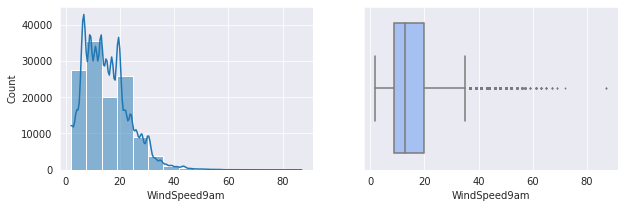

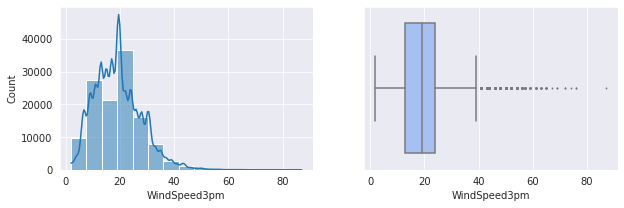

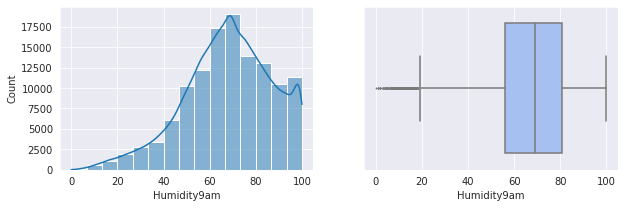

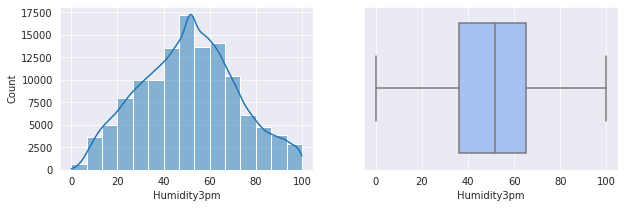

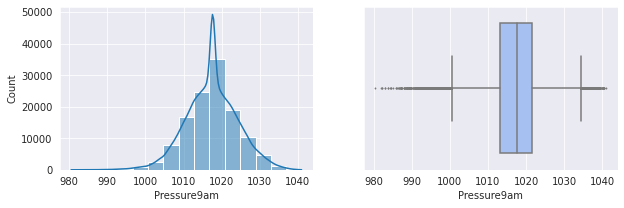

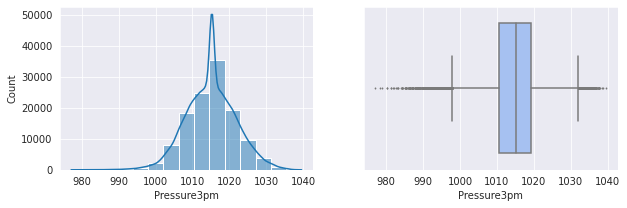

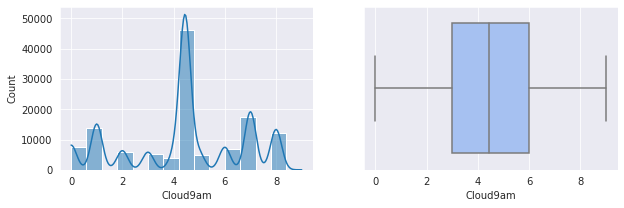

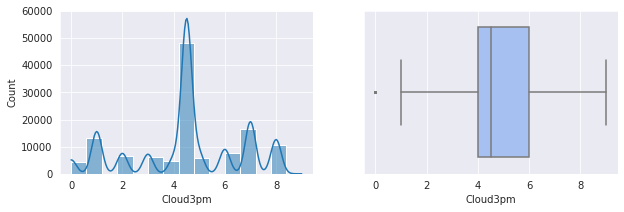

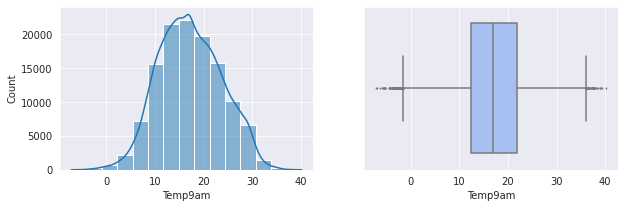

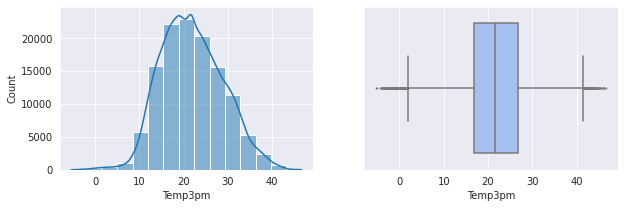

In [21]:
for i in num_columns:
    fig, axs = plt.subplots(1,2,figsize=(10,3));
    sns.histplot(df[i],bins=15, kde=True, ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

**Relationship between Max Temperature and Evaporation**

Text(0.5, 0, 'Max temperature in degree celsius')

Text(0, 0.5, 'Evaporation in Class A pan evaporation (mm)')

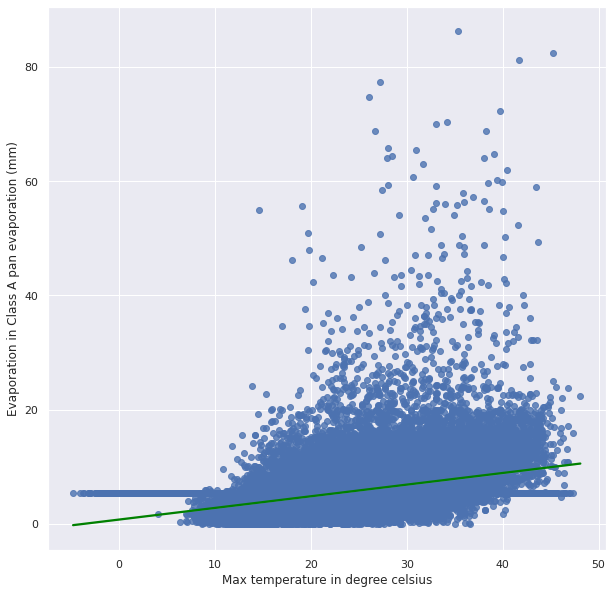

In [22]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.regplot(x=df["MaxTemp"], y=df["Evaporation"],line_kws={"color": "green"})
plt.xlabel("Max temperature in degree celsius")
plt.ylabel("Evaporation in Class A pan evaporation (mm)")
fig.set_size_inches(10, 10)
plt.show()

* As seen from the scatterplot, we can infer that there is a positive correlation between Max Temperature and Evaporation. The higher the Max Temperature, the higher the value of Evaporation, this correlates with the scientific reasoning of how water evaporates faster when the temperature is high.

**Relationship between Sunshine and Minimum Temperature**

Text(0.5, 0, 'Evaporation in Class A pan evaporation (mm)')

Text(0, 0.5, 'Rainfall in milimetre')

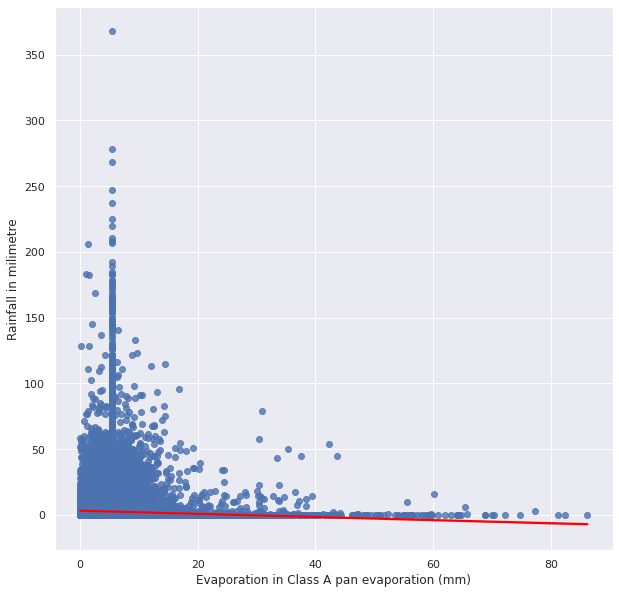

[[ 1.         -0.04509163]
 [-0.04509163  1.        ]]


In [23]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.regplot(x=df["Evaporation"], y=df["Rainfall"],line_kws={"color": "red"})
plt.xlabel("Evaporation in Class A pan evaporation (mm)")
plt.ylabel("Rainfall in milimetre")
fig.set_size_inches(10, 10)
plt.show()
print(np.corrcoef(df["Evaporation"].to_numpy(), df["Rainfall"].to_numpy()))

* As we can see from the scatterplot, there is a negative correlation between Evaporation and Rainfall. This can be due to the fact the majority of the Rainfall data is between 0 and 30. Because of the scientific reasonings, we expected evaporation to play a huge part in contributing to rainfall, however this graph shows us that there may be other factors affecting rainfall outside of evaporation.

**Relationship between Sunshine and Temperature at 3pm**

Text(0.5, 0, 'Sunshine')

Text(0, 0.5, 'Temperature at 3pm in degree celsius')

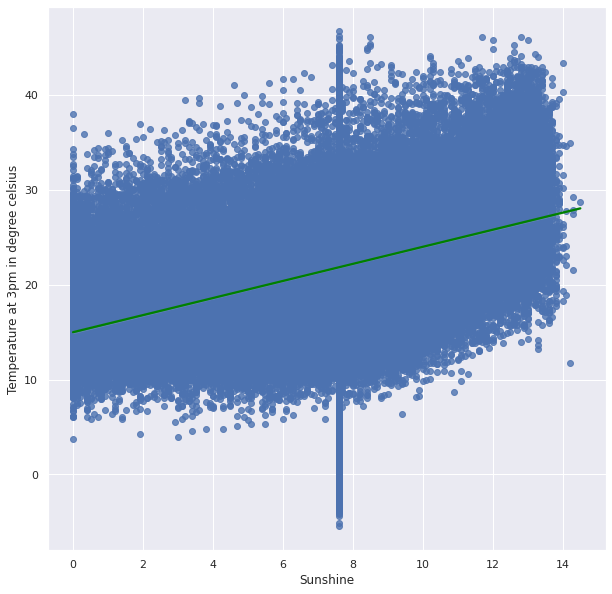

In [24]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.regplot(x=df["Sunshine"], y=df["Temp3pm"],line_kws={"color": "green"})
plt.xlabel("Sunshine")
plt.ylabel("Temperature at 3pm in degree celsius")
fig.set_size_inches(10, 10)
plt.show()

* As we can see from the scatterplot, there is a positive correlation between Sunshine and Temperature at 3pm. This tells us that the more sunshine there is, the higher the temperature at 3pm is. This makes sense scientifically as sunshine emit heat which in turn increases the overall atmospheric temperature.

**Relationship between Minimum Temperature and Humidity at 9am**

Text(0.5, 0, 'Minimum Temp at degree celsius')

Text(0, 0.5, 'Humidity at 9am in percent')

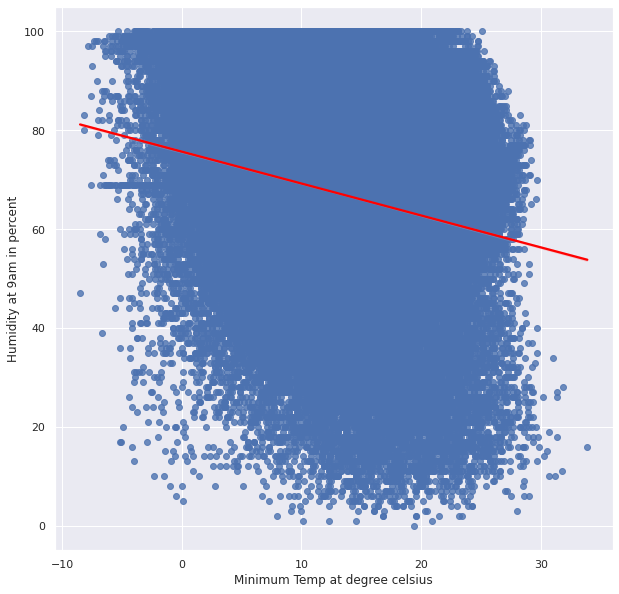

[[ 1.         -0.21668144]
 [-0.21668144  1.        ]]


In [25]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.regplot(x=df["MinTemp"], y=df["Humidity9am"],line_kws={"color": "red"})
plt.xlabel("Minimum Temp at degree celsius")
plt.ylabel("Humidity at 9am in percent")
fig.set_size_inches(10, 10)
plt.show()
print(np.corrcoef(df["MinTemp"].to_numpy(), df["Humidity9am"].to_numpy()))

* As we can see from the scatterplot, our hypothesis is incorrect. There is a negative correlation between Temperature and Humidity. The relation between humidity and are inversely proportional. If temperature increases it will lead to a decrease in relative humidity, thus the air will become drier whereas when temperature decreases, the air will become wet means the relative humidity will increase.


**Checking correlation using heatmap**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


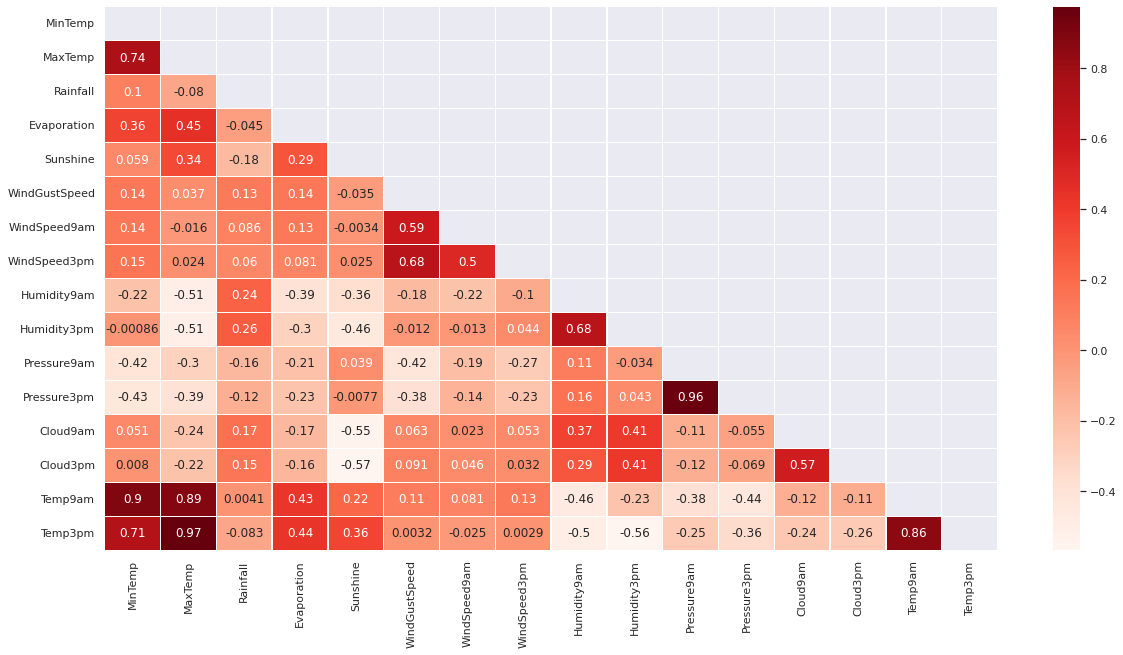

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), annot=True, cmap="Reds", mask=mask, linewidth=0.5)

* The following pairs of features are having high correlation between them:

1. MaxTemp and MinTemp

2. Pressure9am and Pressure3pm

3. Temp9am and Temp3pm

4. Evaporation and MaxTemp

5. MaxTemp and Temp3pm

# Checking structure in data

In [30]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [31]:
nc = ss.fit_transform(df.loc[:,num_columns])

In [32]:
nc.shape 

(123710, 16)

In [33]:
nc = pd.DataFrame(nc, columns = num_columns)
nc.head(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.154880,-0.079769,-0.208215,-0.025707,-0.020896,0.247578,0.600477,0.562994,0.175790,-1.384723,-1.436179,-1.182839,1.568477,0.005318,-0.056942,-0.013661
1,-0.787514,0.225537,-0.278572,-0.025707,-0.020896,0.247578,-1.325551,0.329649,-1.247103,-1.240765,-1.007544,-1.078421,0.010998,0.005318,-0.010630,0.343185


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_columns:
    nc[i] = le.fit_transform(df[i])

In [35]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [36]:
nc.shape

(123710, 22)

In [37]:
from numpy.random import default_rng
rng = default_rng()

In [38]:
rng = np.random.default_rng()
nc_rand = pd.DataFrame(rng.normal(size = (123710,16)),
                       columns = num_columns  # Assign column names, just like that
                       )

In [39]:
cat_columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [40]:
nc_rand['Location'] = np.random.randint(1,48,  size = (123710,))   
nc_rand['WindGustDir']        = np.random.randint(1,17,   size = (123710,))   
nc_rand['WindDir9am']       = np.random.randint(1,17, size = (123710,))   
nc_rand['WindDir3pm']     = np.random.randint(1,17,  size = (123710,))   
nc_rand['RainToday']       = np.random.randint(2,   size = (123710,))   
nc_rand['RainTomorrow']       = np.random.randint(2,   size = (123710,))

# Parallel Coordinate Plots

In [41]:
df.nunique(axis=0)

Location          47
MinTemp          389
MaxTemp          502
Rainfall         647
Evaporation      351
Sunshine         146
WindGustDir       16
WindGustSpeed     66
WindDir9am        16
WindDir3pm        16
WindSpeed9am      39
WindSpeed3pm      41
Humidity9am      102
Humidity3pm      102
Pressure9am      543
Pressure3pm      542
Cloud9am          11
Cloud3pm          11
Temp9am          439
Temp3pm          501
RainToday          2
RainTomorrow       2
dtype: int64

In [42]:
df.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

Text(0.5, 1.0, 'Parallel chart with random data')

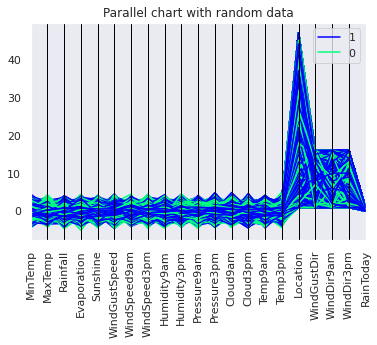

In [43]:
fig1 = plt.figure()
pd.plotting.parallel_coordinates(nc_rand,
                                 'RainTomorrow',    
                                  colormap='winter'
                                  )
plt.xticks(rotation=90)
plt.title("Parallel chart with random data")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

Text(0.5, 1.0, 'Parallel chart with ad data')

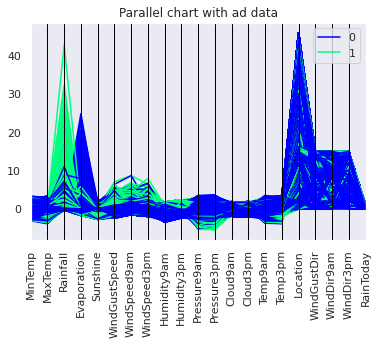

In [44]:
fig2 = plt.figure()
ax = pd.plotting.parallel_coordinates(nc,
                                 'RainTomorrow',
                                  colormap= 'winter'
                                  )

plt.xticks(rotation=90)
plt.title("Parallel chart with ad data")

In [45]:
nc.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,0.154880,-0.079769,-0.208215,-0.025707,-0.020896,0.247578,0.600477,0.562994,0.175790,-1.384723,-1.436179,-1.182839,1.568477,0.005318,-0.056942,-0.013661,1,13,13,14,0,0
1,-0.787514,0.225537,-0.278572,-0.025707,-0.020896,0.247578,-1.325551,0.329649,-1.247103,-1.240765,-1.007544,-1.078421,0.010998,0.005318,-0.010630,0.343185,1,14,6,15,0,0
2,0.076347,0.308803,-0.278572,-0.025707,-0.020896,0.396959,0.480100,0.796339,-1.563302,-1.000836,-1.450960,-0.944168,0.010998,-1.175929,0.575984,0.186173,1,15,13,15,0,0
3,-0.504796,0.627987,-0.278572,-0.025707,-0.020896,-1.246232,-0.482914,-1.187093,-1.194403,-1.672638,0.027092,-0.332574,0.010998,0.005318,0.128305,0.657208,1,4,9,0,0,0
4,0.798849,1.224723,-0.161311,-0.025707,-0.020896,0.023507,-0.964421,0.096304,0.755487,-0.856878,-0.977983,-1.346925,1.130064,1.647849,0.081993,1.113970,1,13,1,7,0,0


# Andrew Plots

Text(0.5, 1.0, 'Andrews plots with random data')

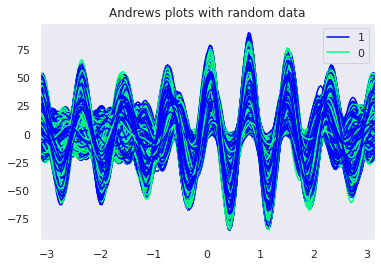

In [46]:
fig3 = plt.figure()
pd.plotting.andrews_curves(nc_rand,
                           'RainTomorrow',
                           colormap = 'winter')

plt.title("Andrews plots with random data")

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 9 Text major ticklabel objects>)

Text(0.5, 1.0, 'Andrews curve with original data')

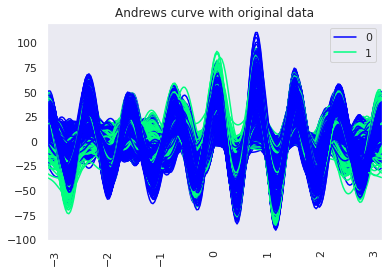

In [47]:
fig4 = plt.figure()
pd.plotting.andrews_curves(nc,
                           'RainTomorrow',
                            colormap = plt.cm.winter
                           )
plt.xticks(rotation=90)
plt.title("Andrews curve with original data")

# Popout target

In [48]:
#  to separate predictors and target

y = df['RainTomorrow']

# 3.4   Create an alias of predictors dataset 
X = df   # X is another name for df

In [49]:
df["RainTomorrow"].value_counts()

No     96318
Yes    27392
Name: RainTomorrow, dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X[cat_columns] = X[cat_columns].apply(le.fit_transform)

In [51]:
df["RainTomorrow"].value_counts()

0    96318
1    27392
Name: RainTomorrow, dtype: int64

In [52]:
X.min().min()           
X.max().max()           

## Save memory
X = X.astype('float32')

-8.5

1041.0

In [53]:
# Store column names somewhere
# for use in feature importance

colnames = X.columns.tolist()

In [54]:

# Split dataset into train and validation parts
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle = True,
                                                    stratify = y
                                                    )

##
X_train.shape        # (65025, 30)
X_test.shape         # (35014, 30)
y_train.shape        # (65025,)
y_test.shape         # (35014,)

(98968, 22)

(24742, 22)

(98968,)

(24742,)

# Creating Pipeline

In [55]:
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA

In [56]:
## Pipeline steps
# steps: List of (name, transform) tuples
#       (implementing fit/transform) that are
#       chained, in the order in which they
#       are chained, with the last object an
#       estimator.
#      Format: [(name, transformer), (name, transformer)..(name, estimator)]

steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)        # Specify other parameters here
            )
            ]

# Instantiate Pipeline object

pipe_xg = Pipeline(steps_xg)

# Another way to create pipeline:
# Not used below

# Pipe_xg1 = make_pipeline (
#                          ss(),
#                          PCA(),
#                          XGBClassifier(silent = False,
#                                        n_jobs=2)
#                          )


# Grid Search

In [57]:
##################### DD. Grid Search #################

# Specify xgboost parameter-range
# Dictionary of parameters (16 combinations)
#     Syntax: {
#              'transformerName__parameterName' : [ <listOfValues> ]
#              }
#
# What parameters in the pipe are available for tuning

print("\n\n--Which parameters can be tuned?--\n\n")
pipe_xg.get_params()




--Which parameters can be tuned?--




{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('xg', XGBClassifier(n_jobs=3, silent=False))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'xg': XGBClassifier(n_jobs=3, silent=False),
 'sts__copy': True,
 'sts__with_mean': True,
 'sts__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'xg__base_score': 0.5,
 'xg__booster': 'gbtree',
 'xg__colsample_bylevel': 1,
 'xg__colsample_bynode': 1,
 'xg__colsample_bytree': 1,
 'xg__gamma': 0,
 'xg__learning_rate': 0.1,
 'xg__max_delta_step': 0,
 'xg__max_depth': 3,
 'xg__min_child_weight': 1,
 'xg__missing': None,
 'xg__n_estimators': 100,
 'xg__n_jobs': 3,
 'xg__nthread': None,
 'xg__objective': 'binary:logistic',
 'xg__random_state': 0,
 'xg__reg_alpha': 0,
 'xg__reg_lambda': 1,
 'xg__scale_pos_weight': 1,
 'xg__seed': None,
 'xg__silent': False,
 'xg__subs

In [58]:
 ## Define dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
              'xg__n_estimators':   [200,  300],  # Number of boosted trees to fit
                                                  # l1 and l2 specifications will change
                                                  # the values of coeff of boosted trees
                                                  # but not their numbers

              'xg__max_depth':      [4,6],
              'pca__n_components' : [25,30],
              'xg__booster': ['gbtree','gblinear']
              }                               # Total: 2 * 2 * 2 * 2



In [59]:
#       Define revised dictionary

parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
               'xg__max_depth':      [4,6],
 
              'pca__n_components' : [2,11],
               }                               # Total: 2 * 2 * 2 * 2



In [60]:
#    Grid Search (16 * 2) iterations
#    Create Grid Search object first with all necessary
#    specifications. Note that data, X, as yet is not specified

#    Data Leakage and pipelining:
#    Pipeline avoids data leakage during GridSearch
#    See this: https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976

clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )



In [61]:
## Start fitting pipeline to data
import time
import os
import gc
import random 

print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60   



--Takes time...---

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xg',
                                        XGBClassifier(n_jobs=3,
                                                      silent=False))]),
             n_jobs=2,
             param_grid={'pca__n_components': [2, 11],
                         'xg__learning_rate': [0.03, 0.05],
                         'xg__max_depth': [4, 6]},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=1)

2.055070996284485

# Final Predictions

In [62]:

f"Best score: {clf.best_score_} "            

print()
f"Best parameter set {clf.best_params_}"

'Best score: 0.9998811064819845 '

"Best parameter set {'pca__n_components': 11, 'xg__learning_rate': 0.05, 'xg__max_depth': 6}"

In [71]:
# Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# Permutation feature importance
from sklearn.inspection import permutation_importance

In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df[cat_columns] = df[cat_columns].apply(le.fit_transform)

In [73]:
# Make predictions using the best returned model

y_pred = clf.predict(X_test)
print("--Few predictions--\n")
y_pred[:4]

# Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0             # 'Accuracy: 82.11165535218126'

# Confusion matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)



--Few predictions--



array(['Yes', 'No', 'No', 'No'], dtype=object)



--Accuracy Score--



99.67262145339907



--Confusion Matrix--



array([[19242,    22],
       [   59,  5419]])



--ROC curve--



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


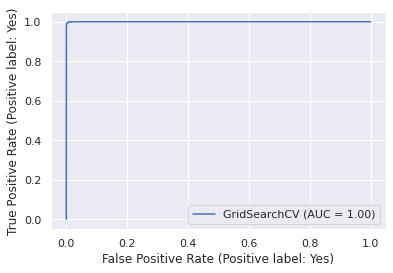

In [74]:
# ROC curve and get AUC
print("\n\n--ROC curve--\n")
_=plot_roc_curve(clf, X_test, y_test)

In [75]:
# Get feature importances from GridSearchCV best fitted 'xg' model

print("\n\n--How many features--\n")
clf.best_estimator_.named_steps["xg"].feature_importances_.shape

print("\n\n---Feature importances---\n")
clf.best_estimator_.named_steps["xg"].feature_importances_



--How many features--



(11,)



---Feature importances---



array([0.08660843, 0.3022326 , 0.01908264, 0.00553635, 0.01014665,
       0.02221879, 0.01024152, 0.02564739, 0.36822647, 0.13600229,
       0.01405688], dtype=float32)

In [76]:
clf.best_estimator_.named_steps["xg"].feature_importances_.shape

(11,)

In [78]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [79]:
index = ['WindGustDir', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']

In [80]:
imp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

df_imp = pd.DataFrame(
                      data = imp_values,
                      index = index,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')

In [81]:
df_imp

,imp
WindSpeed9am,0.005536
WindSpeed3pm,0.010147
Humidity3pm,0.010242
Cloud3pm,0.014057
WindDir3pm,0.019083
Humidity9am,0.022219
Pressure9am,0.025647
WindGustDir,0.086608
Cloud9am,0.136002
WindDir9am,0.302233


In [82]:
# First five columns with least feature importance are:

list(df_imp.index.values[:5])

['WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Cloud3pm', 'WindDir3pm']